# Constants

In [1]:
DEV_SET_PATH = '../data/development_final_data.csv'
VAL_SET_PATH = '../data/evaluation_final_data.csv'
MODELS_DIR = '../models' # where to save intermediate models

# Imports

In [2]:
import pandas as pd
import numpy as np
import sys

sys.path.append('../src/')
from functions import BMIPredictor, ModelIO, ModelEvaluator, compare_model_metrics

# Initialization

In [3]:
model_io = ModelIO(MODELS_DIR)
predictor = BMIPredictor()

# Baseline Models

In [4]:
# Load train data
train_data = pd.read_csv(DEV_SET_PATH)

# Prepare dependent and independent variables
y_train = train_data['BMI']
X_train = train_data.drop(columns=['BMI'])

In [4]:
train_data.head()

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,19.0,-0.116074,-0.151651,-0.366867,-0.154353,-0.357553,-0.396184,-0.258769,-0.239862,-0.330029,...,-0.264395,-0.445361,-0.178185,-0.497202,-0.161263,-0.315570,-0.357998,-0.129594,-0.214033,0.019673
1,23.5,-0.108980,-0.151651,-0.366867,-0.154353,2.663768,-0.393737,-0.258769,-0.239862,-0.360113,...,-0.329484,-0.500254,2.108974,-0.481538,-0.170765,-0.315570,0.118380,0.024110,0.196608,-0.210150
2,25.8,-0.106369,-0.151651,-0.366867,-0.019414,-0.361007,-0.077031,-0.258769,-0.239862,-0.380398,...,-0.329484,-0.494017,-0.162598,-0.461486,-0.170765,-0.315570,-0.357998,-0.129594,-0.199298,-0.180683
3,23.5,-0.116074,-0.106995,-0.026565,-0.154353,-0.351405,-0.389180,1.200847,-0.239862,-0.392011,...,-0.134492,-0.100140,-0.178185,0.309746,-0.071131,0.515577,-0.357998,-0.129594,-0.230236,-0.221277
4,22.6,-0.096208,0.037702,8.788685,-0.154353,-0.158938,-0.396184,-0.258769,-0.239862,0.765691,...,3.041408,-0.229310,-0.178185,-0.233995,0.005653,0.368071,0.740698,-0.129594,0.070595,-0.193578


In [8]:
# Train models
bl_trained_models = predictor.fit(X_train, y_train)

# Save models
for model_name, model in bl_trained_models.items():
    model_io.save_model(model, model_name, suffix='baseline')

## Evaluation

In [5]:
# Load evaluation data
val_data = pd.read_csv(VAL_SET_PATH)

# Prepare dependent and independent variables
X_val = val_data.drop(columns=['BMI'])
y_val = val_data['BMI']

In [20]:
val_data.head()

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,25.7,-0.137066,-0.151394,1.507344,-0.123487,-0.340352,-0.235384,-0.150081,-0.204181,-0.486055,...,-0.379542,4.900793,-0.180919,-0.163163,0.634181,-0.161203,0.313723,-0.104544,-0.170046,0.635386
1,27.2,-0.137066,-0.151394,-0.389535,-0.123487,-0.340352,-0.320879,-0.237927,-0.204181,-0.524096,...,-0.379542,-0.429761,-0.180919,-0.488701,-0.233484,-0.236104,-0.465205,-0.104544,-0.434144,-0.199604
2,22.4,-0.137066,-0.109337,-0.389535,-0.123487,-0.339793,-0.268389,-0.237927,-0.204181,-0.354578,...,-0.379542,-0.309204,-0.180919,-0.408756,-0.233484,-0.036834,0.311906,-0.051068,-0.065268,-0.199604
3,25.5,-0.137066,-0.151394,-0.336909,-0.123487,-0.336658,-0.307868,-0.237927,-0.204181,-0.473925,...,-0.322818,-0.262680,-0.180919,-0.472188,-0.181469,-0.236104,-0.465205,0.072187,0.436634,-0.178628
4,21.6,-0.137066,-0.151394,-0.389535,-0.123487,-0.340352,-0.320879,-0.237927,-0.204181,-0.524096,...,-0.379542,-0.429761,-0.180919,-0.488701,-0.233484,-0.236104,-0.465205,-0.104544,-0.434144,-0.199604


The bootstrapping method is used under the hood because it provides a way to assess the uncertainty in the performance metrics.

### ElasticNet

In [10]:
bl_elastic_net_evaluator = ModelEvaluator(
    model=model_io.load_model('ElasticNet', suffix='baseline'), 
    model_name="ElasticNet"
)

bl_elastic_net_evaluator.evaluate(X_val, y_val)

In [14]:
bl_elastic_net_report_df = bl_elastic_net_evaluator.generate_report()
bl_elastic_net_report_df.head()

,mean,std,median,CI_low,CI_high
RMSE,3.952,0.320,3.940,3.361,4.622
MAE,2.874,0.183,2.878,2.524,3.266
R2,0.004,0.022,0.005,-0.042,0.043


### SVR

In [11]:
bl_svr_evaluator = ModelEvaluator(
    model=model_io.load_model('SVR', suffix='baseline'), 
    model_name="SVR"
)

bl_svr_evaluator.evaluate(X_val, y_val)

In [13]:
bl_svr_report_df = svr_evaluator.generate_report()
bl_svr_report_df.head()

,mean,std,median,CI_low,CI_high
RMSE,3.805,0.353,3.811,3.148,4.559
MAE,2.485,0.192,2.493,2.095,2.879
R2,0.078,0.033,0.077,0.013,0.144


### BayesianRidge

In [12]:
bl_bayesian_ridge_evaluator = ModelEvaluator(
    model=model_io.load_model('BayesianRidge', suffix='baseline'), 
    model_name="BayesianRidge"
)

bl_bayesian_ridge_evaluator.evaluate(X_val, y_val)

In [12]:
bl_bayesian_ridge_report_df = bayesian_ridge_evaluator.generate_report()
bl_bayesian_ridge_report_df.head()

,mean,std,median,CI_low,CI_high
RMSE,3.740,0.311,3.733,3.155,4.388
MAE,2.602,0.183,2.607,2.244,2.956
R2,0.107,0.048,0.108,0.008,0.198


### Comparison

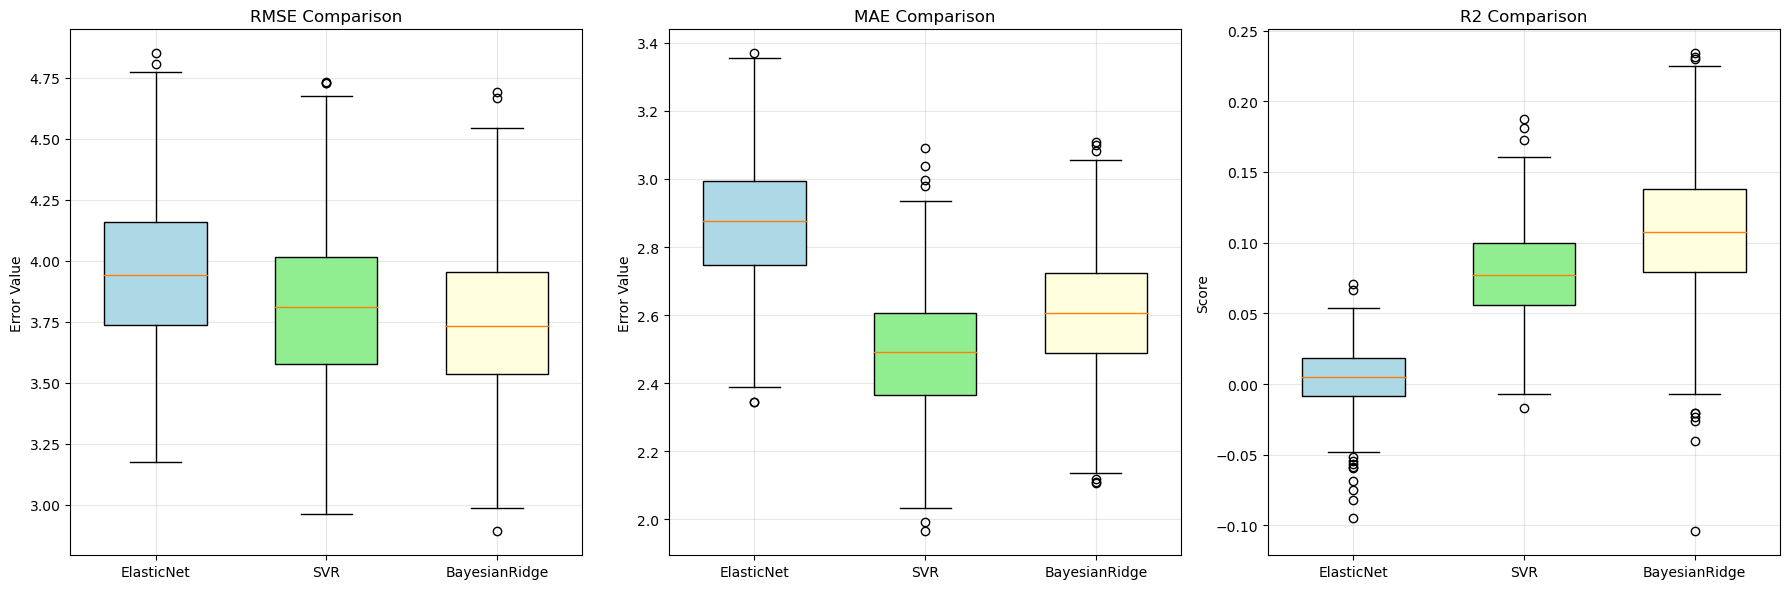

In [11]:
compare_model_metrics(
    bl_elastic_net_evaluator,
    bl_svr_evaluator,
    bl_bayesian_ridge_evaluator
)

# Feature Selection

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

dt_estimator = DecisionTreeRegressor(random_state=42)

RFECV_selector = RFECV(dt_estimator, cv=5, scoring='neg_mean_squared_error')  # Use a regression scoring metric
RFECV_selector = RFECV_selector.fit(X_train, y_train)

print("Optimal number of features: %d" % RFECV_selector.n_features_)
print("Selected features: %s" % X_train.columns[RFECV_selector.support_])

Optimal number of features: 70
Selected features: Index(['Acholeplasma axanthum', 'Acidaminococcus intestini',
       'Actinomyces lingnae', 'Akkermansia muciniphila',
       'Alistipes finegoldii', 'Alistipes onderdonkii', 'Alistipes putredinis',
       'Alistipes shahii', 'Alistipes timonensis',
       'Anaerofustis stercorihominis', 'Anaerostipes caccae',
       'Anaerotruncus colihominis', 'Bacillus megaterium',
       'Bacteroides eggerthii', 'Bacteroides fragilis',
       'Bacteroides intestinalis', 'Bacteroides massiliensis',
       'Bacteroides ovatus', 'Bacteroides plebeius', 'Bacteroides salyersiae',
       'Bifidobacterium pseudocatenulatum', 'Bifidobacterium saguini',
       'Bifidobacterium tsurumiense', 'Bilophila wadsworthia',
       'Blautia glucerasea', 'Blautia hydrogenotrophica', 'Blautia producta',
       'Butyricimonas virosa', 'Catabacter hongkongensis',
       'Christensenella minuta', 'Collinsella aerofaciens',
       'Coprobacillus cateniformis', 'Coprococcus e

In [10]:
X_train_lean = X_train.loc[:, RFECV_selector.support_]
X_val_lean = X_val.loc[:, RFECV_selector.support_]

In [8]:
# Train models
lean_trained_models = predictor.fit(X_train_lean, y_train)

# Save models
for model_name, model in lean_trained_models.items():
    model_io.save_model(model, model_name, suffix='lean')

## Evaluation

### ElasticNet

In [9]:
lean_elastic_net_evaluator = ModelEvaluator(
    model=model_io.load_model('ElasticNet', suffix='lean'), 
    model_name="ElasticNet"
)

lean_elastic_net_evaluator.evaluate(X_val_lean, y_val)

In [10]:
lean_elastic_net_report_df = lean_elastic_net_evaluator.generate_report()
lean_elastic_net_report_df.head()

,mean,std,median,CI_low,CI_high
RMSE,3.951,0.320,3.938,3.359,4.620
MAE,2.879,0.183,2.883,2.526,3.260
R2,0.005,0.022,0.006,-0.041,0.043


### SVR

In [11]:
lean_svr_evaluator = ModelEvaluator(
    model=model_io.load_model('SVR', suffix='lean'), 
    model_name="SVR"
)

lean_svr_evaluator.evaluate(X_val_lean, y_val)

In [12]:
lean_svr_report_df = lean_svr_evaluator.generate_report()
lean_svr_report_df.head()

,mean,std,median,CI_low,CI_high
RMSE,3.784,0.351,3.789,3.134,4.542
MAE,2.484,0.189,2.487,2.088,2.872
R2,0.088,0.033,0.088,0.019,0.155


### BayesianRidge

In [13]:
lean_bayesian_ridge_evaluator = ModelEvaluator(
    model=model_io.load_model('BayesianRidge', suffix='lean'), 
    model_name="BayesianRidge"
)

lean_bayesian_ridge_evaluator.evaluate(X_val_lean, y_val)

In [14]:
lean_bayesian_ridge_report_df = lean_bayesian_ridge_evaluator.generate_report()
lean_bayesian_ridge_report_df.head()

,mean,std,median,CI_low,CI_high
RMSE,3.680,0.295,3.663,3.136,4.294
MAE,2.615,0.177,2.617,2.261,2.962
R2,0.135,0.055,0.137,0.014,0.228


### Comparison

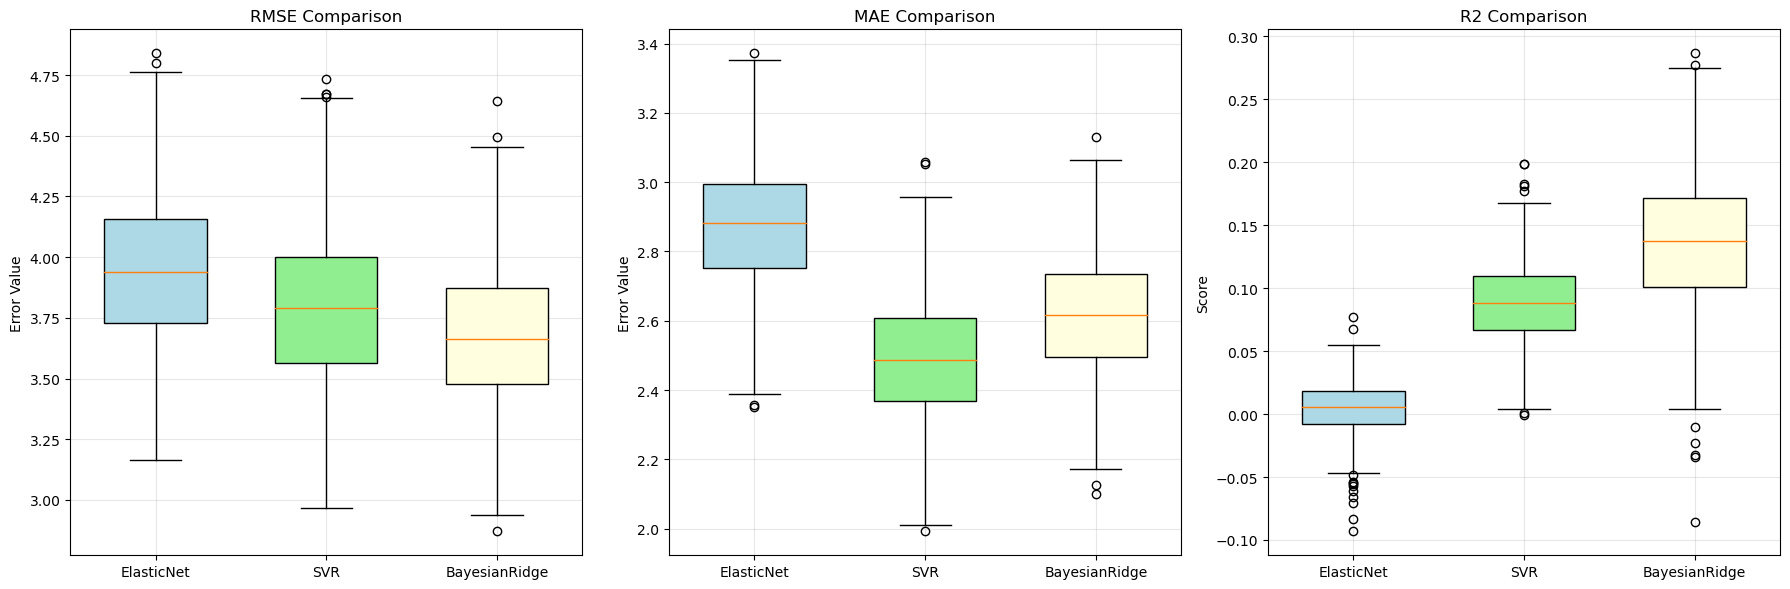

In [15]:
compare_model_metrics(
    lean_elastic_net_evaluator,
    lean_svr_evaluator,
    lean_bayesian_ridge_evaluator
)

# Model Tuning